### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

I want to see firstly what columns have null data. For substantially large number of null values, we might decide that we can't gain meaningful insight; and therefore might be worthwhile to exclude that data from further analysis.

In [4]:
print(f'Total Rows: {len(data)}')
data.isna().sum()

Total Rows: 12684


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

For some of the columns regarding how many times a person goes to a bar, coffee house, etc. there is a decent number of nulls. But, they still might prove useful, the `cars` column however has a substantial amount of nulls. In fact, 99.15% of the rows have a null `car` column. This might be worth excluding, let's see what the other values are and their counts to see if it's worth keeping.

In [5]:
car_values = data['car'].value_counts(dropna=False)
print(f'Car Values: \n{car_values}')

Car Values: 
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

Yeah, there's no cohesiveness between these columns' values. And probably not helpful to our analysis, so we'll drop it.

In [6]:
# Rename misspelled column and remove column with missing data
data.rename(columns={'passanger': 'passenger'}, inplace=True)
data_two = data.drop('car', axis=1).copy()

# Count remaining rows that have any missing data
print(f'Rows with a missing column value: {data_two.isna().any(axis=1).sum():,.0f}')


# Drop any row with missing values since we can't analyze it
data_two.dropna(inplace=True)
print(f'Original row count: {data.shape[0]:,.0f}')
print(f'New row count: {data_two.shape[0]:,.0f}')
print(f'Percentage difference: {((abs(data.shape[0] - data_two.shape[0]) / ((data.shape[0] + data_two.shape[0]) / 2)) * 100):,.2f}%')

Rows with a missing column value: 605
Original row count: 12,684
New row count: 12,079
Percentage difference: 4.89%


4. What proportion of the total observations chose to accept the coupon?



In [7]:
print(f'Total Observations: {data_two.shape[0]:,.0f}')
print(f'Total Coupons Accepted: {data_two['Y'].where(data['Y'] == 1).sum():,.0f}')
print(f'Proportion of Coupons Accepted: {data_two['Y'].mean()}')

Total Observations: 12,079
Total Coupons Accepted: 6,877
Proportion of Coupons Accepted: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

In [8]:
coupon_values = data_two['coupon'].value_counts()
coupon_values

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

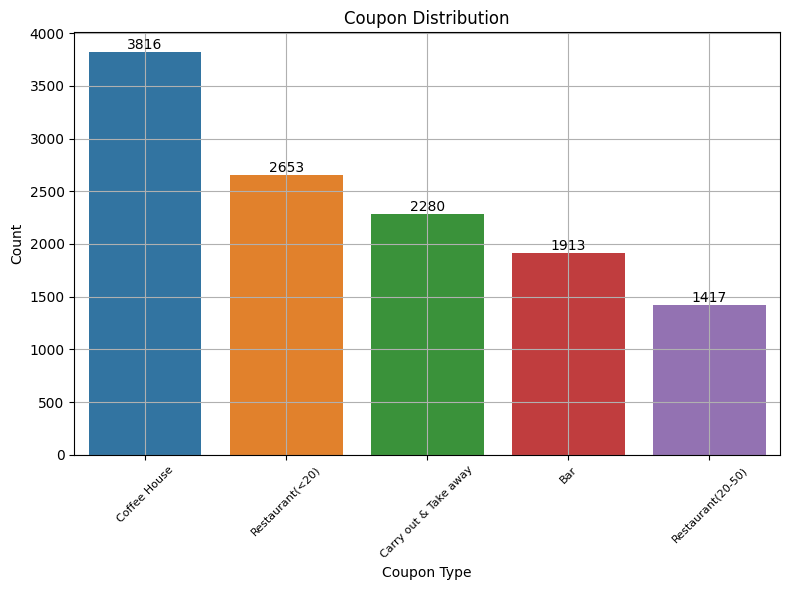

In [9]:
plt.figure(figsize=(8, 6))
coupon_chart = sns.barplot(x=coupon_values.index, y=coupon_values.values, hue=coupon_values.index, legend=False)
# Add the counts of each category to each bar
for container in coupon_chart.containers:
    coupon_chart.bar_label(container)
plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

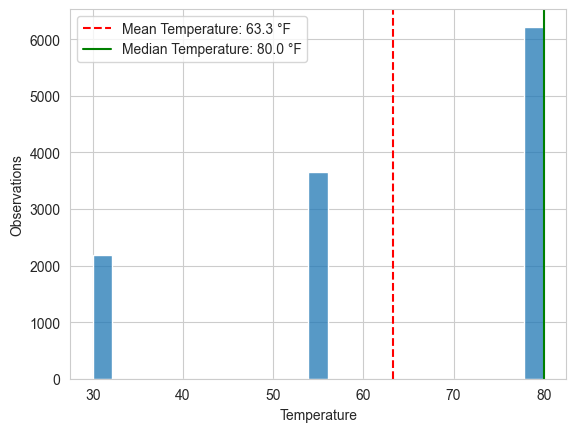

In [10]:
sns.set_style('whitegrid')
temperatures = data_two['temperature'].dropna()
ax = sns.histplot(data=temperatures)
mean_temp = temperatures.mean()
median_temp = temperatures.median()
ax.axvline(mean_temp, color='r', linestyle='--', label=f'Mean Temperature: {mean_temp:.1f} °F')
ax.axvline(median_temp, color='g', linestyle='-', label=f'Median Temperature: {median_temp:.1f} °F')
ax.set_xlabel('Temperature')
ax.set_ylabel('Observations')
ax.legend()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
bar_df = data_two.loc[data_two['coupon'] == 'Bar'].copy()
print(f'Number of Records: {bar_df.shape[0]:,.0f}')
bar_df.head()

Number of Records: 1,913


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [12]:
print(f'Total Number of Rows: {bar_df.shape[0]:,.0f}')
print(f'Number of Bar Coupons Accepted: {bar_df['Y'].where(bar_df['Y'] == 1).sum():,.0f}')
print(f'Proportion of Bar Coupons Accepted: {bar_df['Y'].mean()}')

Total Number of Rows: 1,913
Number of Bar Coupons Accepted: 788
Proportion of Bar Coupons Accepted: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Firstly, I want to see what unique values there are for the 'Bar' column to determine what to do next.

In [13]:
bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

So now we know how to group the rows to differentiate the number of visits to properly distinguish the acceptance rates.

In [14]:
three_or_fewer = bar_df.loc[bar_df['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()
four_or_more = bar_df.loc[bar_df['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()

print('Acceptance rates:')
print(f'≤ 3 visits: {three_or_fewer}')
print(f'> 3 visits: {four_or_more}')

Acceptance rates:
≤ 3 visits: 0.37267441860465117
> 3 visits: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
print(f'Disinct ages: {sorted(bar_df['age'].unique())}')
print('=' * 30)
print(f'Distinct Visit Counts: {bar_df['Bar'].unique()}')
under_25 = ['below21', '21']
over_25 = ['26', '31', '36', '41', '46', '50plus']
over_35 = ['36', '41', '46', '50plus']
visited_more_once = ['1~3', '4~8', 'gt8']

bar_df['under_25'] = np.where(
    (bar_df['age'].isin(under_25)) &
    (bar_df['Bar'].isin(visited_more_once)),
    'Visited >1 and Under 25',
    'All Others'
)
bar_df['over_25'] = np.where(
    (bar_df['age'].isin(over_25)) &
    (bar_df['Bar'].isin(visited_more_once)),
    'Visited >1 and Over 25',
    'All Others'
)
bar_df['over_35'] = np.where(
    (bar_df['age'].isin(over_35)) &
    (bar_df['Bar'].isin(visited_more_once)),
    'Visited >1 and Over 35',
    'All Others'
)
print('\n\n')
# Get acceptance rates
print(bar_df.groupby('under_25')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('over_25')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('over_35')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))

Disinct ages: ['21', '26', '31', '36', '41', '46', '50plus', 'below21']
Distinct Visit Counts: ['never' 'less1' '1~3' 'gt8' '4~8']



                         acceptance_rate  count
under_25                                       
All Others                      0.386468   1744
Visited >1 and Under 25         0.674556    169
                        acceptance_rate  count
over_25                                       
All Others                     0.337748   1510
Visited >1 and Over 25         0.689826    403
                        acceptance_rate  count
over_35                                       
All Others                     0.393303   1762
Visited >1 and Over 35         0.629139    151


From this analysis, there IS a difference. If a driver visited more than once a month, and was over the age of 25, they are MORE likely to accept a coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
bar_df['group_two'] = np.where(
    (bar_df['passenger'] != 'Kid(s)') &
    (bar_df['Bar'].isin(visited_more_once)) &
    (bar_df['occupation'] != 'Farming Fishing & Forestry'),
    'Visited >1, No Kid Passenger, and Not FFF Occupation',
    'All Others'
)

bar_df['no_kid_passenger'] = np.where(
    (bar_df['passenger'] != 'Kid(s)') &
    (~bar_df['age'].isin(['below21'])),
    'No Kid Passenger',
    'Others'
)

print(bar_df.groupby('no_kid_passenger')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('group_two')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))

                  acceptance_rate  count
no_kid_passenger                        
No Kid Passenger         0.435897   1638
Others                   0.269091    275
                                                    acceptance_rate  count
group_two                                                                 
All Others                                                 0.297903   1383
Visited >1, No Kid Passenger, and Not FFF Occup...         0.709434    530


Similar analysis, with a greater disparity. If the driver visited more than once, didn't have a kid passenger (definitely a good thing), and was not in Farming, Fishing, & Forestry, they were MORE likely to accept the coupon.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
print(f'Marital Statuses: {bar_df['maritalStatus'].unique()}')
print('=' * 30)
print(f'Income Ranges: {bar_df['income'].unique()}')
print('=' * 30)
print(f'Cheap Restaurant Visits: {bar_df['RestaurantLessThan20'].unique()}')

less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

Marital Statuses: ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
Income Ranges: ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Cheap Restaurant Visits: ['4~8' '1~3' 'less1' 'gt8' 'never']


In [18]:
# Create filter masks
filter_one = ((bar_df['passenger'] != 'Kid(s)') &
    (bar_df['Bar'].isin(visited_more_once)) &
    (bar_df['maritalStatus'] != 'Widowed'))
filter_two = (
    (bar_df['Bar'].isin(visited_more_once)) &
    (bar_df['age'].isin(['below21', '21', '26']))
)
filter_three = (
    (bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_df['income'].isin(less_than_50k))
)

# Analyze individual filters
bar_df['not_widowed'] = np.where(
    (filter_one),
    'Not Widowed',
    'All Others'
)
bar_df['under_30'] = np.where(
    (filter_two),
    'Under 30',
    'All Others'
)
bar_df['cheap_restaurant'] = np.where(
    (filter_three),
    'Frequents Cheap Restaurants',
    'All Others'
)
bar_df['group_three'] = np.where(
    (filter_one) |
    (filter_two) |
    (filter_three),
    'Meets Any Filter Condition',
    'All Others'
)
print(bar_df.groupby('not_widowed')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('under_30')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('cheap_restaurant')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))
print('=' * 30)
print(bar_df.groupby('group_three')['Y'].agg(
    acceptance_rate='mean',
    count='size'
))

             acceptance_rate  count
not_widowed                        
All Others          0.297903   1383
Not Widowed         0.709434    530
            acceptance_rate  count
under_30                          
All Others         0.348265   1585
Under 30           0.719512    328
                             acceptance_rate  count
cheap_restaurant                                   
All Others                          0.402532   1580
Frequents Cheap Restaurants         0.456456    333
                            acceptance_rate  count
group_three                                       
All Others                         0.299914   1167
Meets Any Filter Condition         0.587131    746


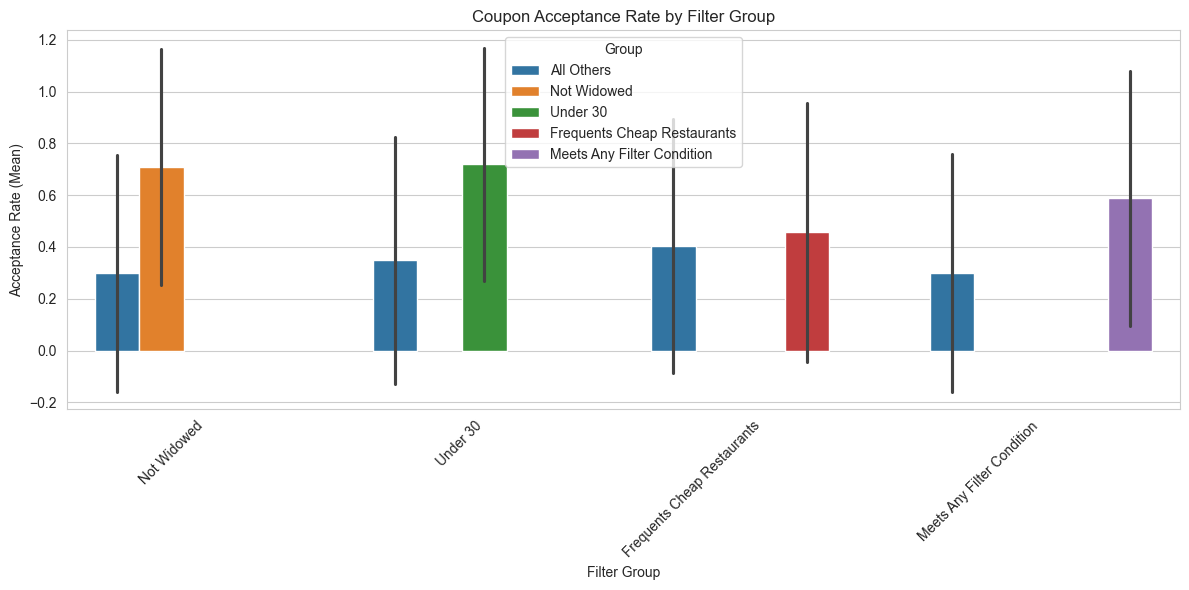

In [19]:
# Massage the different filtered data
df_melted = pd.melt(bar_df, id_vars=['Y'], value_vars=['not_widowed', 'under_30', 'cheap_restaurant', 'group_three'], var_name='Filter Group', value_name='Group')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Filter Group', y='Y', hue='Group', data=df_melted, errorbar="sd")
plt.title('Coupon Acceptance Rate by Filter Group')
plt.ylabel('Acceptance Rate (Mean)')
plt.xticks(rotation=45, ha='right')
ax.set_xticks(['not_widowed', 'under_30', 'cheap_restaurant', 'group_three'])
ax.set_xticklabels(['Not Widowed', 'Under 30', 'Frequents Cheap Restaurants', 'Meets Any Filter Condition'])
plt.tight_layout()
plt.show()

From this analysis into the data, we can see that there is nearly **double** the acceptance rate for anyone that fits within one of three groups.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Analysis
Although the occupation analysis was limited in scope, it can still be useful in determining a correlation (not necessarily causation) between those in specific occupations and whether they accept a bar coupon. This can be further explored if we analyze acceptance rates for different occupations. Ultimately, we can come up with a few observations about whose more likely to accept a bar coupon:

1. **Frequently visits a bar**
    - Drivers who visited a bar at least once a month, had nearly 70% acceptance, while if they visit >3 times, that was roughly 6% higher
2. **No Kid Passenger**
    - Drivers who did not have kid passengers were more likely to accept a coupon (~44%)
3. **Under 30**
    - Strong indicator of acceptance was if the driver was under 30, with a ~72% acceptance
4. **Not Widowed**
    - Drivers who were not explicitly widowed had a high acceptance rate
5. **Not in Certain Occupation**
    - Drivers who were not in specific jobs (i.e. Farming, Fishing, & Forestry) were more likely to accept

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Coffee House Investigation

In [20]:
# Create a DataFrame for coffee house coupons and check the size
coffee_data = data_two.loc[data_two['coupon'] == 'Coffee House'].copy()
print(coffee_data.shape[0])

3816


In [21]:
# Get the column names for reference
coffee_data.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

## Exploratory Data Analysis
Let's first analyze overall acceptance.

In [22]:
# Overall acceptance rate for Coffee House coupons
total = coffee_data.shape[0]
accepted = coffee_data['Y'].sum()
rate = coffee_data['Y'].mean()

print(f'Total Coffee House records: {total:,.0f}')
print(f'Accepted: {accepted:,.0f}')
print(f'Acceptance rate: {rate:.4f} ({rate*100:.2f}%)')

Total Coffee House records: 3,816
Accepted: 1,894
Acceptance rate: 0.4963 (49.63%)


**Observation**

We can see that overall acceptance of coffee house coupons is just under half, let's see what specific factors might indicate whose more likely to accept a coffee house coupon.

1. Let's see acceptance between gender

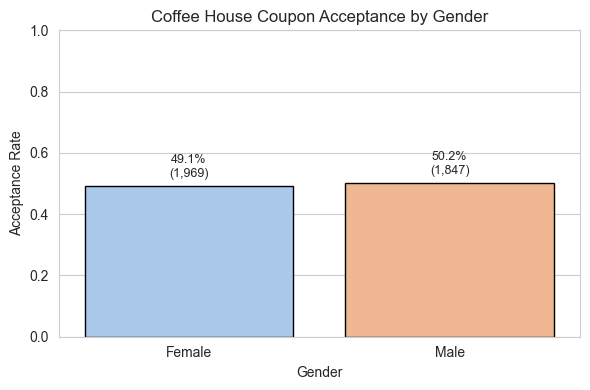

In [23]:
# Group data by gender
grouped = coffee_data.groupby('gender')['Y'].agg(['mean','count']).reset_index()

# Create bar plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x='gender', y='mean', data=grouped, palette='pastel', hue='gender', edgecolor='k')
ax.set_ylim(0, 1)
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('Gender')
ax.set_title('Coffee House Coupon Acceptance by Gender')

# Annotate bars with percentage and counts
for i, row in grouped.iterrows():
    ax.text(i, row['mean'] + 0.02, f"{row['mean']:.1%}\n({int(row['count']):,.0f})", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Interesting, we can see that there is almost an even split between genders.

2. Let's look at acceptance by age group

In [24]:
# Group by age and compute acceptance rates
age_groups = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age_summary = coffee_data.groupby('age')['Y'].agg(acceptance_rate='mean', count='size').reindex(age_groups)
age_summary

,acceptance_rate,count
age,,
below21,0.678322,143
21,0.517773,844
26,0.513174,797
31,0.483816,587
36,0.468586,382
41,0.492114,317
46,0.506912,217
50plus,0.419660,529


Now, let's visualize it.

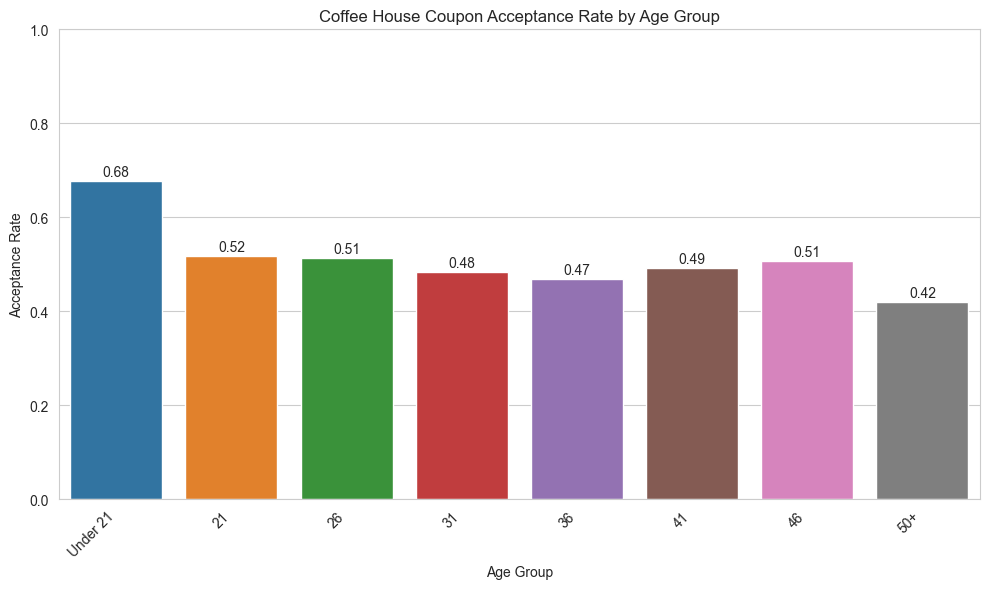

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
acc_by_age_plot = sns.barplot(x='age', y='acceptance_rate', data=age_summary, hue='age')
age_labels = ['Under 21', '21', '26', '31', '36', '41', '46', '50+']
plt.title('Coffee House Coupon Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
acc_by_age_plot.set_xticks(age_groups)
acc_by_age_plot.set_xticklabels(age_labels)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Annotate bars with acceptance rates
for p in acc_by_age_plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2.,
             height + 0.01,
             f'{height:.2f}',
             ha="center")

plt.tight_layout()
plt.show()

We can see with age groups, the highest acceptance was with the under 21 group. This is interesting and might be worth exploring more in depth. Whereas 21-46 are close to an average 50% acceptance rate, with quite the drop off at 50 plus. Let's see what other factors there are.

3. Let's analyze acceptance based on visit frequency

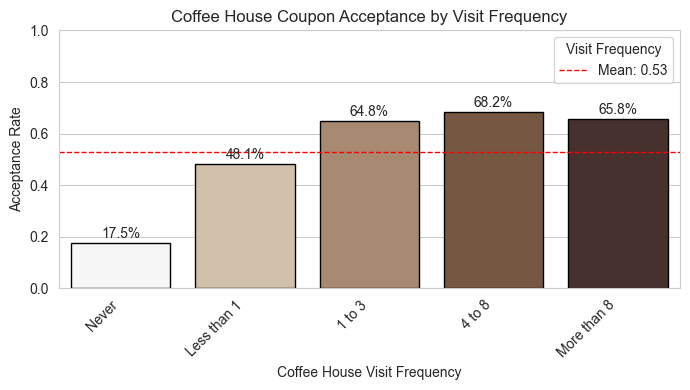

In [26]:
# Visit frequency categories
visit_frequencies =['never', 'less1', '1~3', '4~8', 'gt8']

# Group by coffee house visit frequency and compute acceptance rates
summary = coffee_data.groupby('CoffeeHouse')['Y'].agg(acceptance_rate='mean', count='size').reset_index()
summary = summary.set_index('CoffeeHouse').reindex(visit_frequencies).reset_index()

plt.figure(figsize=(7,4))
ax = sns.barplot(x='CoffeeHouse', y='acceptance_rate', data=summary, hue='CoffeeHouse', palette=[
    '#f7f7f7',  # never
    '#d9c2a3',  # less1
    '#b08968',  # 1~3
    '#7f5539',  # 4~8
    '#4b2e2b'   # gt8
], edgecolor='k')
visit_frequency_labels = ['Never', 'Less than 1', '1 to 3', '4 to 8', 'More than 8']
visit_mean = summary['acceptance_rate'].mean()
ax.axhline(y=visit_mean, color='r', linestyle='--', linewidth=1, label=f'Mean: {visit_mean:.2f}')
ax.set_ylim(0,1)
ax.set_xlabel('Coffee House Visit Frequency')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Coffee House Coupon Acceptance by Visit Frequency')
ax.set_xticks(visit_frequencies)
ax.set_xticklabels(visit_frequency_labels, rotation=45, ha='right')
ax.legend(title='Visit Frequency')

for i, row in summary.iterrows():
    ax.text(i, row['acceptance_rate'] + 0.02, f"{row['acceptance_rate']:.1%}", ha='center')

plt.tight_layout()
plt.show()

We can see that with a driver who frequents coffee shops every month, that they are more likely to accept a coupon.

4. Does weather and temperature play a role? Let's analyze.

In [27]:
bar_df['visit_group'] = np.where(
    bar_df['CoffeeHouse'].isin(['4~8', 'gt8']),
    '>3 visits',
    '≤3 visits'
)
weather = bar_df.groupby(['weather', 'visit_group'])['Y'].mean()
temp = bar_df.groupby(['temperature', 'visit_group'])['Y'].mean()
print(weather)
print('=' * 30)
print(temp)

weather  visit_group
Rainy    >3 visits      0.370000
         ≤3 visits      0.360390
Snowy    >3 visits      0.355932
         ≤3 visits      0.311377
Sunny    >3 visits      0.503546
         ≤3 visits      0.426279
Name: Y, dtype: float64
temperature  visit_group
30           >3 visits      0.353535
             ≤3 visits      0.322259
55           >3 visits      0.500000
             ≤3 visits      0.433476
80           >3 visits      0.453125
             ≤3 visits      0.398305
Name: Y, dtype: float64


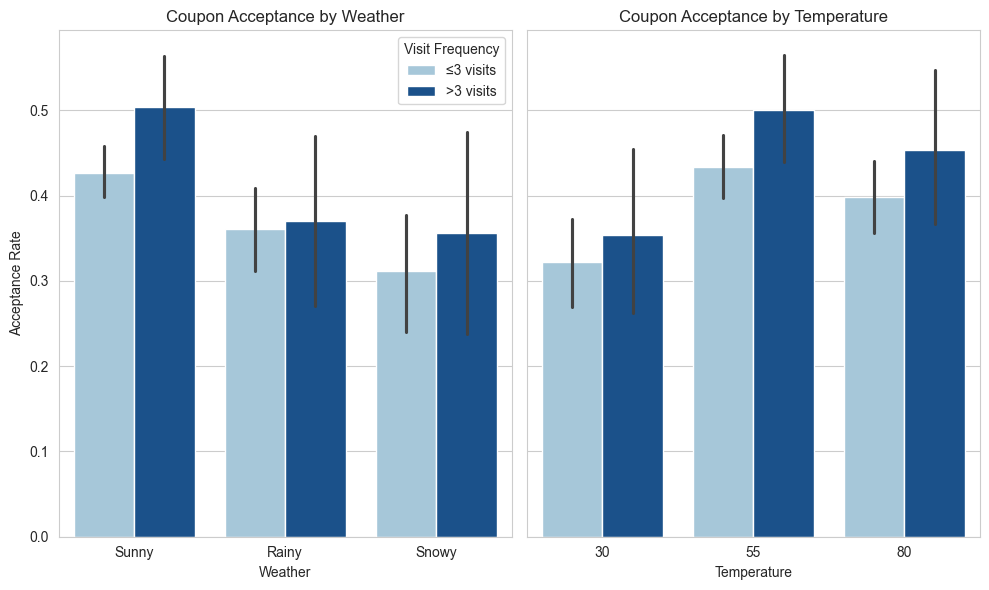

In [28]:
palette = {
    '≤3 visits': '#9ecae1',
    '>3 visits': '#08519c'
}
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
# Create first bar plot for weather
sns.barplot(x='weather', y='Y', hue='visit_group', data=bar_df, ax=ax[0], palette=palette)
ax[0].set_title('Coupon Acceptance by Weather')
ax[0].set_ylabel('Acceptance Rate')
ax[0].set_xlabel('Weather')
# Create second bar plot for temperature
sns.barplot(x='temperature', y='Y', hue='visit_group', data=bar_df, ax=ax[1], palette=palette)
ax[1].set_title('Coupon Acceptance by Temperature')
ax[1].set_ylabel('')
ax[1].set_xlabel('Temperature')

# Remove legend from the second plot
ax[1].legend_.remove()
ax[0].legend(title='Visit Frequency')

plt.tight_layout()
plt.show()

We can see that when the weather here is sunny, that there are overall higher acceptance rates. And when the temperature is around 55 degrees we see higher acceptance vs when it's warmer (which makes sense), but also when it's colder. Why could that be? Less people going out when it's that cold? Having additional context would help analyze this. Individually these two plots gives us valuable information about habits of those who accept the coupon based on the conditions they're in. 

5. Investigating coupon acceptance by passenger

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']


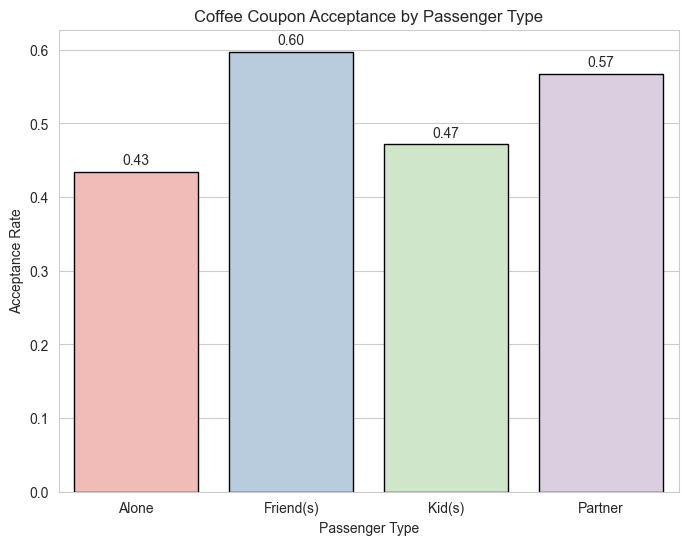

In [29]:
# Group by passenger type and compute acceptance rates
passenger_agg = (
    coffee_data.groupby('passenger', as_index=False)
      .agg(
          acceptance_rate=('Y', 'mean'),
          count=('Y', 'size')
      )
)
print(coffee_data['passenger'].unique())
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=passenger_agg,
    x='passenger',
    y='acceptance_rate',
    hue='passenger',
    palette='Pastel1',
    edgecolor='k'
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # center of the bar
        y=height + 0.01,                  # slightly above the top
        s=f'{height:.2f}',                # format to 2 decimals
        ha='center'
    )
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')
plt.title('Coffee Coupon Acceptance by Passenger Type')
plt.show()

We can now gather from this visualization that when a passenger is a friend or partner, that there is a much higher acceptance rate than being alone or having a kid or kids as passengers.